In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn import preprocessing
import requests
import json

# 1. Получаем данные выборки

## 1.1. Пользовательские данные и название файла

In [2]:
username = 'MyUserName' # здесь ваш логин CodeWars
file_name = 'my_data'+'.json' # название файла (в формате json)

In [539]:
def get_data_from_codewars(username, filename_jsnon: json):
    data = {}
    page_number = 0
    while requests.get(
            f'https://www.codewars.com/api/v1/users/{username}/code-challenges/completed?page={page_number}').status_code == 200:
        q = requests.get(
            f'https://www.codewars.com/api/v1/users/{username}/code-challenges/completed?page={page_number}')
        result = q.json()
        if not result['data']:
            break
        for j in result['data']:
            j_id = j['id']
            print(f'Получен {j_id}')
            data[j_id] = {}
            data[j_id]['completedAt'] = j['completedAt']
            data[j_id]['completedLanguages'] = j['completedLanguages']
            chal = requests.get(f'https://www.codewars.com/api/v1/code-challenges/{j_id}')
            result_chal = chal.json()
            data[j_id]['rank'] = abs(result_chal['rank']['id'])
            data[j_id]['url'] = result_chal['url']
            data[j_id]['totalAttempts'] = result_chal['totalAttempts']
            data[j_id]['totalCompleted'] = result_chal['totalCompleted']
            data[j_id]['totalStars'] = result_chal['totalStars']
            data[j_id]['voteScore'] = result_chal['voteScore']
            data[j_id]['tags'] = result_chal['tags']
        page_number += 1
        print(f'Обработано(ы) {page_number} страниц(а/ы)')

    with open(filename_jsnon, "w") as outfile:
        json.dump(data, outfile)

In [3]:
get_data_from_codewars(username, file_name)

NameError: name 'get_data_from_codewars' is not defined

# 2. Получение данных

In [3]:
df = pd.read_json(r'%s' % (file_name)).T
df.head()

,completedAt,completedLanguages,rank,url,totalAttempts,totalCompleted,totalStars,voteScore,tags
592915cc1fad49252f000006,2023-12-23T13:33:10.762Z,[python],7,https://www.codewars.com/kata/592915cc1fad4925...,7225,2443,60,458,"[Restricted, Fundamentals]"
558fa34727c2d274c10000ae,2023-12-23T08:08:19.409Z,[python],7,https://www.codewars.com/kata/558fa34727c2d274...,11447,3735,67,461,"[Fundamentals, Strings]"
580a4001d6df740d61000301,2023-12-23T07:57:15.144Z,[python],7,https://www.codewars.com/kata/580a4001d6df740d...,8358,2255,34,461,"[Lists, Arrays, Fundamentals]"
56d93f249c844788bc000002,2023-12-23T07:47:37.150Z,[python],7,https://www.codewars.com/kata/56d93f249c844788...,15353,2140,34,462,"[Puzzles, Games]"
570f6436b29c708a32000826,2023-12-23T07:40:58.589Z,[python],7,https://www.codewars.com/kata/570f6436b29c708a...,10703,3035,58,462,"[Algorithms, Strings, Fundamentals]"


In [4]:
df['completedAt'] = pd.to_datetime(df['completedAt'])
df['completedAt'] = df['completedAt'].apply(lambda x: x.strftime('%Y-%b'))
df_compLanguages = df.explode('completedLanguages')
full_df = df_compLanguages.explode('tags')

In [5]:
full_df

,completedAt,completedLanguages,rank,url,totalAttempts,totalCompleted,totalStars,voteScore,tags
592915cc1fad49252f000006,2023-Dec,python,7,https://www.codewars.com/kata/592915cc1fad4925...,7225,2443,60,458,Restricted
592915cc1fad49252f000006,2023-Dec,python,7,https://www.codewars.com/kata/592915cc1fad4925...,7225,2443,60,458,Fundamentals
558fa34727c2d274c10000ae,2023-Dec,python,7,https://www.codewars.com/kata/558fa34727c2d274...,11447,3735,67,461,Fundamentals
558fa34727c2d274c10000ae,2023-Dec,python,7,https://www.codewars.com/kata/558fa34727c2d274...,11447,3735,67,461,Strings
580a4001d6df740d61000301,2023-Dec,python,7,https://www.codewars.com/kata/580a4001d6df740d...,8358,2255,34,461,Lists
...,...,...,...,...,...,...,...,...,...
50654ddff44f800200000004,2020-May,python,8,https://www.codewars.com/kata/50654ddff44f8002...,6714819,5501836,2341,19175,Fundamentals
50654ddff44f800200000004,2020-May,javascript,8,https://www.codewars.com/kata/50654ddff44f8002...,6714819,5501836,2341,19175,Debugging
50654ddff44f800200000004,2020-May,javascript,8,https://www.codewars.com/kata/50654ddff44f8002...,6714819,5501836,2341,19175,Fundamentals
50654ddff44f800200000004,2020-May,sql,8,https://www.codewars.com/kata/50654ddff44f8002...,6714819,5501836,2341,19175,Debugging


# 3. Вопросы

## 1. По каким тегам решено наибольшее количество задач?

<Axes: xlabel='tags'>

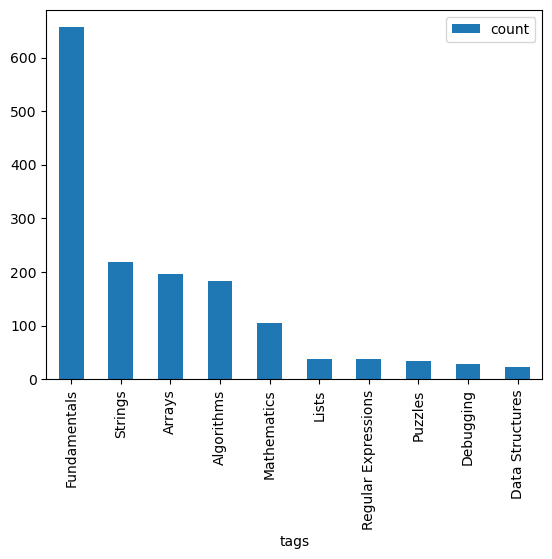

In [6]:
full_df['tags'].value_counts().to_frame().head(10)
full_df['tags'].value_counts().to_frame().head(10).plot.bar()

## 1.1. Облако тегов

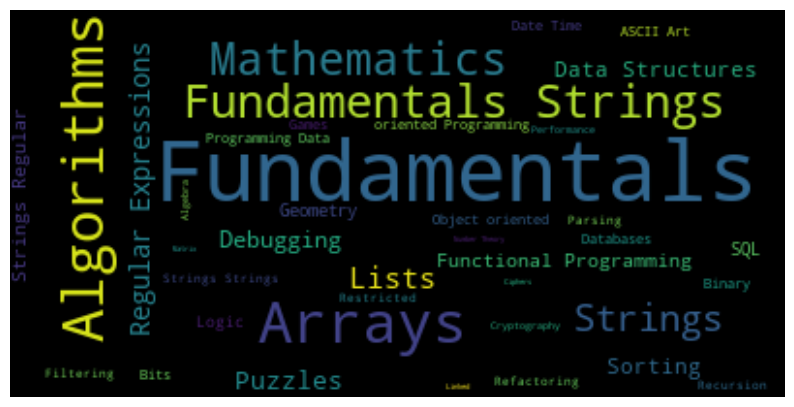

In [7]:
tags = ' '.join(i for i in full_df['tags'].to_list())
wordcloud = WordCloud().generate(tags)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
df[df['rank']==df['rank'].min()]['url']

529bf0e9bdf7657179000008    https://www.codewars.com/kata/529bf0e9bdf76571...
Name: url, dtype: object

## 2.  В какое время я решал задачу наиболее часто

<Axes: xlabel='completedAt'>

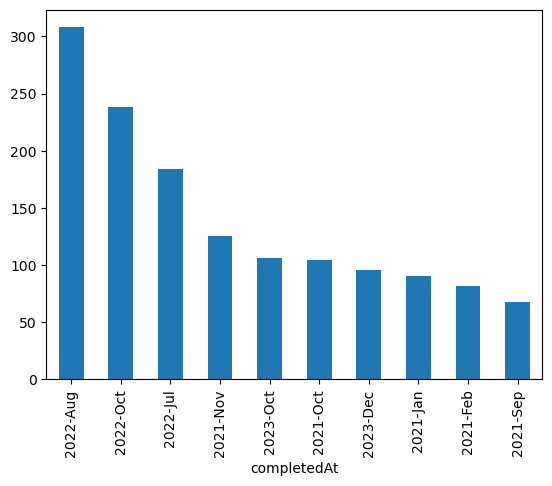

In [9]:
full_df['completedAt'].value_counts().head(10).plot.bar()

# 3. Максимальная сложность каты за время тренировки

In [10]:
df[df['rank']==4]

,completedAt,completedLanguages,rank,url,totalAttempts,totalCompleted,totalStars,voteScore,tags
529bf0e9bdf7657179000008,2022-Jul,[python],4,https://www.codewars.com/kata/529bf0e9bdf76571...,333520,42838,2418,4409,"[Data Structures, Algorithms]"


## 4. Изменение рейтинга каты за период тренировки

In [11]:
normalized_arr = preprocessing.normalize(df[['totalAttempts', 'totalCompleted', 'totalStars', 'voteScore']])
df[['totalAttempts', 'totalCompleted', 'totalStars', 'voteScore']] = normalized_arr

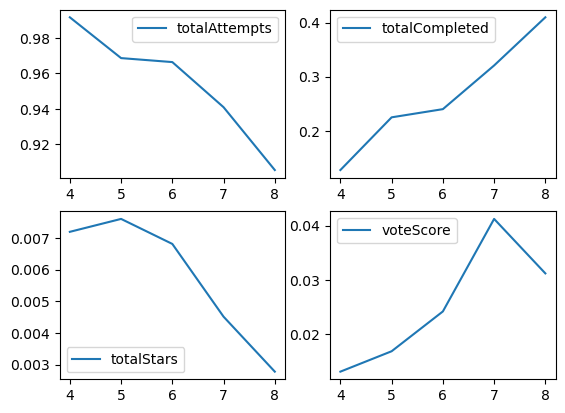

In [12]:
rating = df[['rank', 'totalAttempts', 'totalCompleted', 'totalStars', 'voteScore']].groupby('rank').mean().reset_index()
fig, axs = plt.subplots(2,2)
a = list(rating.columns)[1:]
for i in range(2):
    for j in range(2):
        axs[i,j].plot(rating['rank'],rating[a[0]])
        axs[i,j].legend([a[0]])
        del a[0]


## 5. Какой язык у вас самый популярный?

In [13]:
lang = df_compLanguages.groupby('completedLanguages')[['completedLanguages']].count().rename(columns={'completedLanguages':'Languages'}).reset_index().sort_values(by='Languages', ascending=False)
lang['Languages'] =(100. * lang['Languages'] / lang['Languages'].sum()).round(0)
lang

,completedLanguages,Languages
2,python,95.0
3,sql,4.0
0,java,1.0
1,javascript,0.0


(1.0, 100.0)

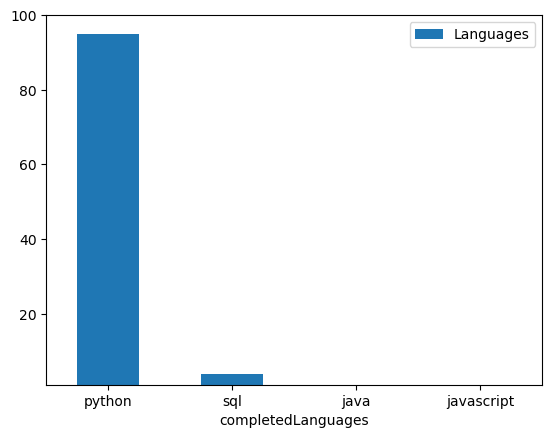

In [14]:
b = lang.plot.bar(x='completedLanguages', y='Languages', rot=0)
b.set_ylim(1,100)

## 6. Коэффициент сложности на каждый уровень

In [15]:
full_df['Hard'] = full_df['totalAttempts']/full_df['totalCompleted']

In [16]:
hard_level = full_df.groupby(['rank'])['Hard'].mean().to_frame().reset_index()

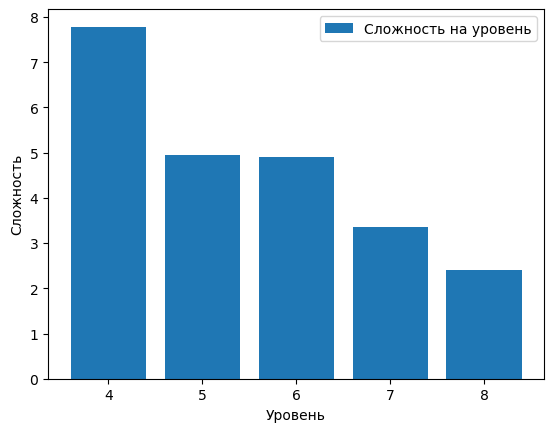

In [17]:
fig, ax = plt.subplots()
ax.bar(hard_level['rank'], hard_level['Hard'])
ax.set_xlabel('Уровень')
ax.set_ylabel('Сложность')
ax.legend(['Сложность на уровень'])

In [18]:
hard_level

,rank,Hard
0,4,7.785611
1,5,4.953624
2,6,4.91064
3,7,3.347758
4,8,2.407474


## 6.1 Топ 10 тегов самых сложных и лёгких задач

In [19]:
hardest_by_tags = full_df.groupby('tags')['Hard'].mean().reset_index().sort_values(by='Hard')
hardest_by_tags

,tags,Hard
8,Data Science,1.588788
38,Statistics,2.055251
35,SQL,2.219901
24,Matrix,2.445644
12,Debugging,2.469671
10,Databases,2.518518
14,Filtering,2.629646
1,Algebra,2.70894
4,Binary,2.871626
18,Geometry,3.092321


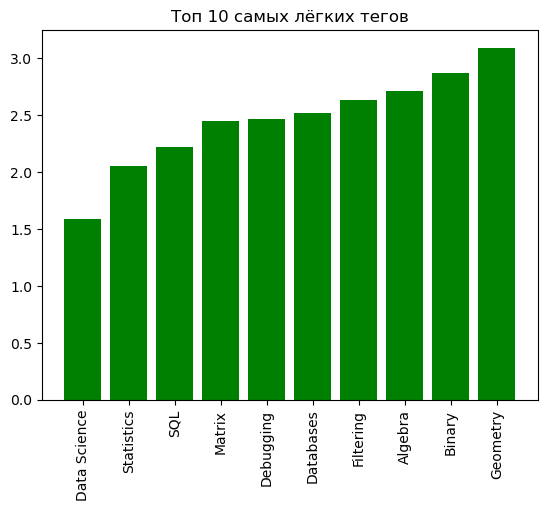

In [20]:
plt.bar(hardest_by_tags['tags'].head(10), hardest_by_tags['Hard'].head(10), color='green')
plt.title('Топ 10 самых лёгких тегов')
plt.xticks(rotation=90)
fig.set_size_inches(10.0, 10.5)

Text(0.5, 1.0, 'Топ 10 самых сложных тегов')

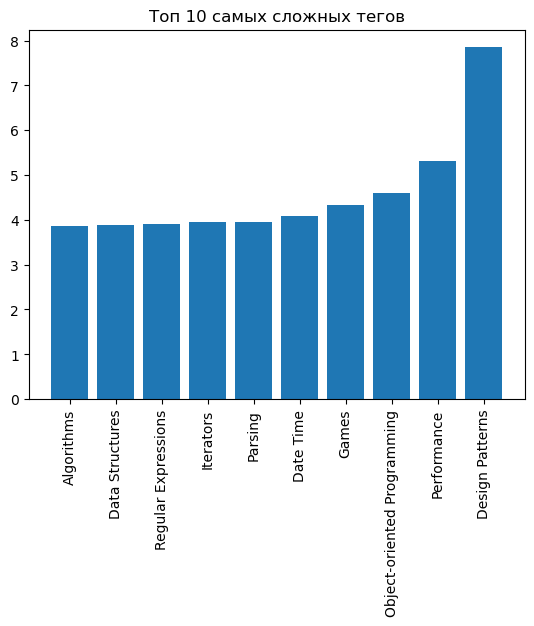

In [21]:
plt.bar(hardest_by_tags['tags'].tail(10), hardest_by_tags['Hard'].sort_values().tail(10))
plt.xticks(rotation=90)
plt.title('Топ 10 самых сложных тегов')

# 6.2. Распределение уровня сложности по достижениям

In [31]:
by_rank_hard = full_df.groupby(['rank','tags'])['Hard'].mean().to_frame().sort_values(by='Hard')
by_rank_hard

Hard
rank tags                                  
8    Parsing                        1.51733
     Data Science                  1.588788
     Filtering                     1.849149
     SQL                           1.898059
     Tutorials                     1.911038
...                                     ...
4    Data Structures               7.785611
     Algorithms                    7.785611
6    Object-oriented Programming   7.851685
     Design Patterns               7.851685
5    Fundamentals                 11.527172

[104 rows x 1 columns]

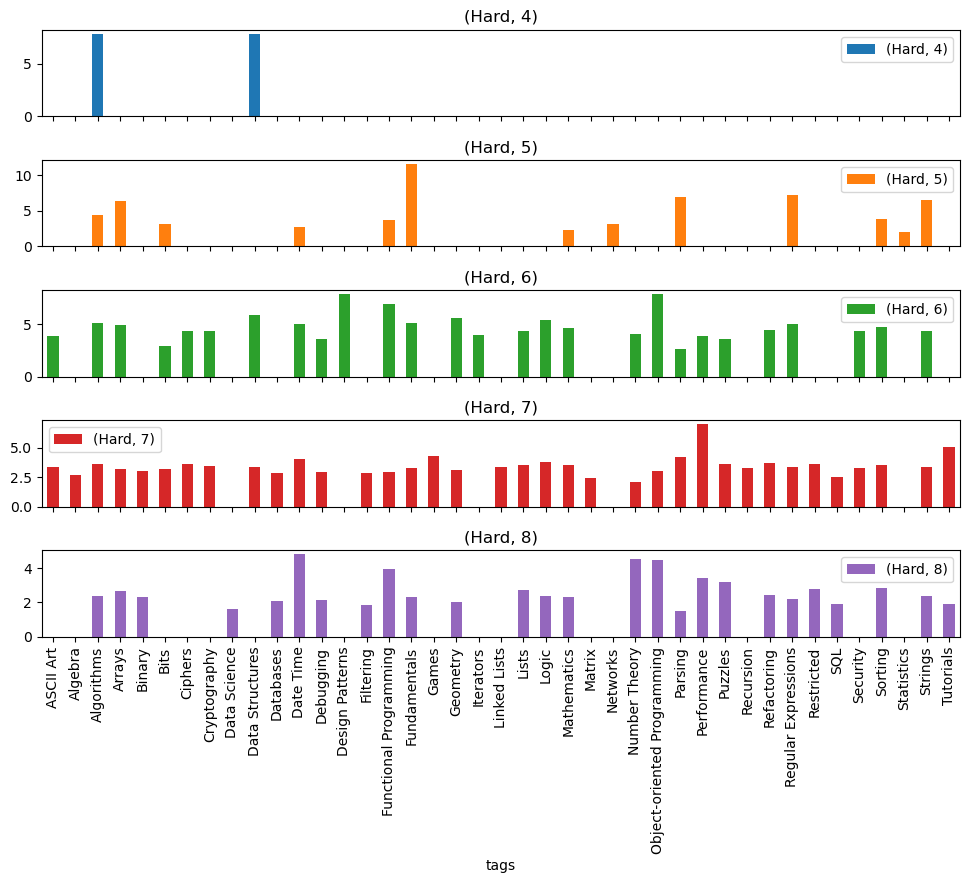

In [27]:
ax = by_rank_hard.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 7), layout=(5,1))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

## 7. Коэффициент корреляции по задачам

In [648]:
df[['totalAttempts', 'totalCompleted', 'totalStars', 'voteScore']].corr()

,totalAttempts,totalCompleted,totalStars,voteScore
totalAttempts,1.000000,-0.974010,0.266644,-0.397884
totalCompleted,-0.974010,1.000000,-0.238336,0.422718
totalStars,0.266644,-0.238336,1.000000,0.145818
voteScore,-0.397884,0.422718,0.145818,1.000000


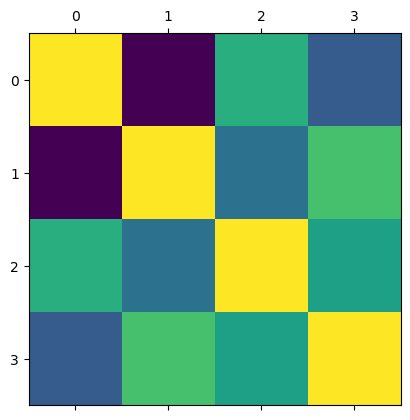

In [647]:
plt.matshow(df[['totalAttempts', 'totalCompleted', 'totalStars', 'voteScore']].corr())
plt.show()

In [659]:
df[['totalAttempts', 'totalCompleted', 'totalStars', 'voteScore']].describe()

,totalAttempts,totalCompleted,totalStars,voteScore
count,811.000000,811.000000,811.000000,811.000000
mean,0.934788,0.333872,0.004341,0.036667
std,0.039776,0.106772,0.002666,0.019088
min,0.773510,0.051517,0.000270,0.002209
25%,0.909285,0.263409,0.002605,0.024123
50%,0.942184,0.332779,0.003732,0.032794
75%,0.963909,0.413046,0.005164,0.045557
max,0.998666,0.633781,0.024419,0.193040
